# Evaluación - Redes Convolucionales

**Autor:** Angelo López

**Correo Electrónico:** an.lopezq@duocuc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Descarga de la data

In [11]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-19 05:10:13--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucced9e573cfdceb4ea5a0d34479.dl.dropboxusercontent.com/cd/0/inline/Cp-Fi-Cedno4LsUzJIWu5nIJBsujet-HOaj0BZ3_I8z01mNhXOWllcc1mJOTPzpNtAgNbEw2jya6qw0Pk2ozbDUEZfIOd2-E63rFCJwtr-ABr29ba3v49dQN0FChq5ULPxF_ZTF2WZx_ltGzr7idO83u/file# [following]
--2025-05-19 05:10:14--  https://ucced9e573cfdceb4ea5a0d34479.dl.dropboxusercontent.com/cd/0/inline/Cp-Fi-Cedno4LsUzJIWu5nIJBsujet-HOaj0BZ3_I8z01mNhXOWllcc1mJOTPzpNtAgNbEw2jya6qw0Pk2ozbDUEZfIOd2-E63rFCJwtr-ABr29ba3v49dQN0FChq5ULPxF_ZTF2WZx_ltGzr7idO83u/file
Resolving ucced9e573cfdceb4ea5a0d34479.dl.dropboxusercontent.com (ucced9e573cfdceb4ea5a0d34479.dl.dropboxusercontent.com)... 162.125.

In [12]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-19 05:10:31--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc257a5a0e882d083feaa99bd2b6.dl.dropboxusercontent.com/cd/0/inline/Cp8XhLrxshwpMWfggcGb1mr6340CJbjHyMRKA-WK27QZfDvKkM4G3QMvJGA1rt6AUPNU1abmQ9Udva1XilspOf4apIVBx8uGcbzg9t25x_Na2dE3AEcsGfquFO96hcKz4YCHKQCjomSrFI-ubp3aMLQu/file# [following]
--2025-05-19 05:10:32--  https://uc257a5a0e882d083feaa99bd2b6.dl.dropboxusercontent.com/cd/0/inline/Cp8XhLrxshwpMWfggcGb1mr6340CJbjHyMRKA-WK27QZfDvKkM4G3QMvJGA1rt6AUPNU1abmQ9Udva1XilspOf4apIVBx8uGcbzg9t25x_Na2dE3AEcsGfquFO96hcKz4YCHKQCjomSrFI-ubp3aMLQu/file
Resolving uc257a5a0e882d083feaa99bd2b6.dl.dropboxusercontent.com (uc257a5a0e882d083feaa99bd2b6.dl.dropboxusercontent.com)... 162.125.6

In [13]:
!tar -xzvf simpsons_train.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/pic_00

In [14]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

In [15]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as keras_backend

In [16]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

In [17]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [18]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [19]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

In [20]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


# Carga de modelos



In [21]:
# Descarga el .h5 auténtico desde la rama main
!wget https://raw.githubusercontent.com/OdysseyAngelo/DL/main/mejor_modelo_modelo2c.h5 -O modelo2c.h5


--2025-05-19 05:11:29--  https://raw.githubusercontent.com/OdysseyAngelo/DL/main/mejor_modelo_modelo2c.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17417064 (17M) [application/octet-stream]
Saving to: ‘modelo2c.h5’

modelo2c.h5         100%[===================>]  16.61M  --.-KB/s    in 0.07s   

2025-05-19 05:11:30 (232 MB/s) - ‘modelo2c.h5’ saved [17417064/17417064]



28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        48
           1       0.62      0.32      0.42        50
           2       0.61      0.28      0.38        50
           3       0.41      0.38      0.39        48
           4       0.36      0.74      0.49        50
           5       0.92      0.22      0.36        49
           6       0.75      0.30      0.43        50
           7       0.50      0.32      0.39        50
           8       0.26      0.88      0.40        50
           9       0.57      0.94      0.71        50
          10       0.68      0.26      0.38        50
          11       0.87      0.26      0.40        50
          12       0.49      0.90      0.63        49
          13       0.37      0.38      0.38        50
          14       0.89      0.35      0.50        49
          15       1.00      0.04      0.08        50
          16       0.28      0.10      0

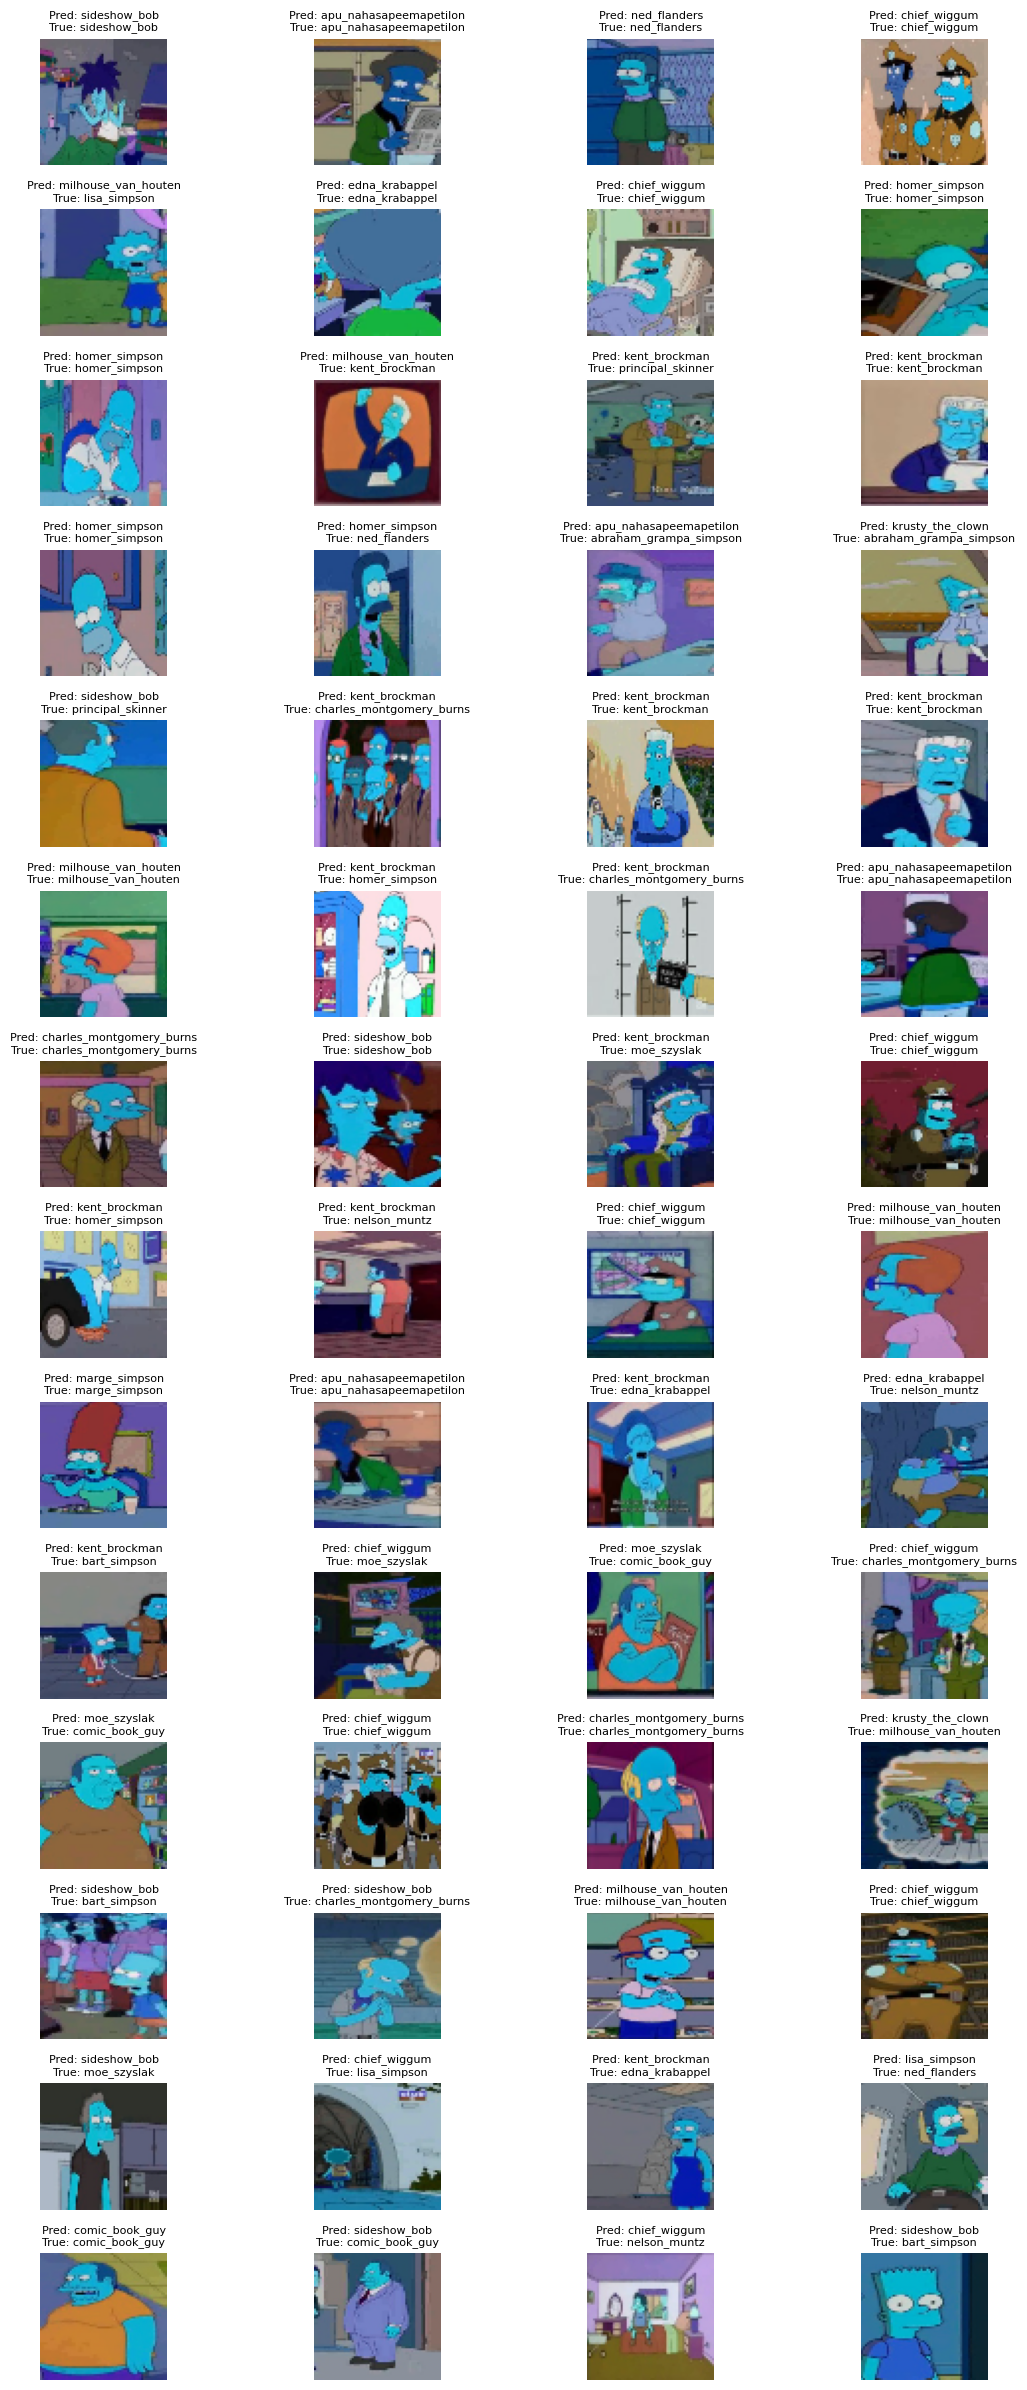

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report


# 2) Cargar el mejor modelo desde disco
modelo = load_model('modelo2c.h5')

# 3) Realizar predicciones sobre X_test normalizado
y_pred_prob = modelo.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# 4) Procesar etiquetas verdaderas
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# 5) Mostrar el informe de clasificación
print(classification_report(
    y_true,
    y_pred,
    target_names=[str(c) for c in MAP_CHARACTERS],
    zero_division=0
))

# 6) Función para grilla de imágenes con predicción vs. real
def plot_image_grid_with_predictions(model, X, y_true=None, class_names=None,
                                     num_rows=14, num_cols=4, figsize=(12, 24)):
    y_pred_prob = model.predict(X)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Procesar etiquetas verdaderas si vienen
    if y_true is not None:
        if y_true.ndim > 1 and y_true.shape[1] > 1:
            y_true_labels = np.argmax(y_true, axis=1)
        else:
            y_true_labels = y_true
    else:
        y_true_labels = None

    plt.figure(figsize=figsize)
    total = num_rows * num_cols
    for i in range(total):
        ax = plt.subplot(num_rows, num_cols, i+1)
        img = X[i]
        # Si es imagen en escala de grises
        if img.ndim == 3 and img.shape[2] == 1:
            ax.imshow(img.squeeze(-1), cmap='gray')
        else:
            ax.imshow(img)
        # Título con predicción y etiqueta real
        pred_label = class_names[y_pred[i]] if class_names else str(y_pred[i])
        title = f"Pred: {pred_label}"
        if y_true_labels is not None:
            true_label = class_names[y_true_labels[i]] if class_names else str(y_true_labels[i])
            title += f"\nTrue: {true_label}"
        ax.set_title(title, fontsize=8)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 7) Mostrar la grilla de predicciones
plot_image_grid_with_predictions(
    model=modelo,
    X=X_test,
    y_true=y_true,
    class_names=MAP_CHARACTERS,
    num_rows=14,
    num_cols=4,
    figsize=(12, 24)
)
